## Important parameters
<br>xt_ocean: longitude, length 3600
<br>yt_ocean: latitude, length 1500
<br> [mind map](https://miro.com/app/board/o9J_lM4N1Pg=/?fromRedirect=1)

In [1]:
import netCDF4 as nc4
import keras
import xarray,numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils
from tensorflow.keras import layers

# Load data

In [2]:
import glob
input_data_split = []
for np_name in glob.glob('dataset/*.np[yz]'):
    input_data_split.append(np.load(np_name))
np.array(input_data_split).shape

(2251, 128, 128, 1)

# Randomly select 1500 samples

In [3]:
import random
n = 1500 # sample size
input_data_split = np.array(random.sample(input_data_split,n))
input_data_split.shape

(1500, 128, 128, 1)

# split train set & validation set

In [4]:
train_set, test_set = train_test_split(input_data_split, test_size=0.3333333)
train_set.shape

(1000, 128, 128, 1)

# Autoencoder

In [12]:
lat = 128 # chunk size
long = 128 # chunk size

input_img = keras.Input(shape=(lat, long,1))

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
# x = layers.MaxPooling2D((1, 1), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu',strides=(1,1), padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((4, 4))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 4)       292       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_transpose_18 (Conv2DT (None, 64, 64, 4)         148       
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 64, 64, 8)         296       
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 256, 256, 8)       0   

In [6]:
history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

Epoch 1/50
32/32 [==============================] - 7s 204ms/step - loss: 0.0424 - val_loss: 0.0238
Epoch 2/50
32/32 [==============================] - 5s 149ms/step - loss: 0.0218 - val_loss: 0.0176
Epoch 3/50
32/32 [==============================] - 5s 154ms/step - loss: 0.0140 - val_loss: 0.0033
Epoch 4/50
32/32 [==============================] - 6s 177ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 5/50
32/32 [==============================] - 5s 157ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/50
32/32 [==============================] - 5s 157ms/step - loss: 0.0011 - val_loss: 9.5024e-04
Epoch 7/50
32/32 [==============================] - 5s 160ms/step - loss: 9.0409e-04 - val_loss: 8.1018e-04
Epoch 8/50
32/32 [==============================] - 5s 169ms/step - loss: 7.8571e-04 - val_loss: 7.1582e-04
Epoch 9/50
32/32 [==============================] - 5s 156ms/step - loss: 6.9043e-04 - val_loss: 6.2792e-04
Epoch 10/50
32/32 [==============================] - 5s 172ms/step - los

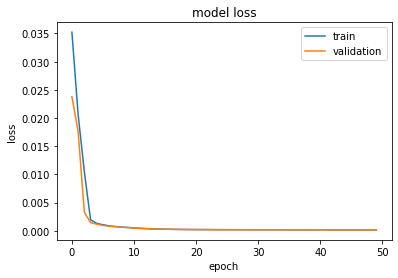

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [8]:
decoded_data = autoencoder.predict(np.array([test_set[10]]))

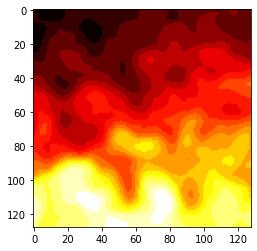

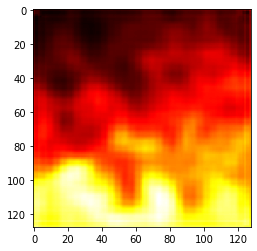

In [9]:
plt.imshow(test_set[10],cmap='hot')
plt.show()
plt.imshow(decoded_data[0,:,:,0],cmap='hot')
plt.show()

## bottleneck size 32 x 32 x n, where n = 1,2,4,8, 16

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 2)       20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 2)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 1)         19        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 32, 32, 1)         10        
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 32, 32, 2)         20  

Epoch 2/50
32/32 [==============================] - 4s 134ms/step - loss: 0.0417 - val_loss: 0.0340
Epoch 3/50
32/32 [==============================] - 5s 140ms/step - loss: 0.0310 - val_loss: 0.0229
Epoch 4/50
32/32 [==============================] - 4s 135ms/step - loss: 0.0207 - val_loss: 0.0159
Epoch 5/50
32/32 [==============================] - 4s 137ms/step - loss: 0.0154 - val_loss: 0.0139
Epoch 6/50
32/32 [==============================] - 4s 137ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 7/50
32/32 [==============================] - 4s 133ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 8/50
32/32 [==============================] - 4s 138ms/step - loss: 0.0114 - val_loss: 0.0053
Epoch 9/50
32/32 [==============================] - 4s 128ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 10/50
32/32 [==============================] - 4s 132ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 11/50
32/32 [==============================] - 4s 134ms/step - loss: 0.0011 - val_loss: 8.884

32/32 [==============================] - 5s 155ms/step - loss: 3.2656e-04 - val_loss: 3.1072e-04
Epoch 15/50
32/32 [==============================] - 5s 155ms/step - loss: 3.0410e-04 - val_loss: 2.9228e-04
Epoch 16/50
32/32 [==============================] - 5s 153ms/step - loss: 2.8789e-04 - val_loss: 2.7801e-04
Epoch 17/50
32/32 [==============================] - 5s 153ms/step - loss: 2.7315e-04 - val_loss: 2.6327e-04
Epoch 18/50
32/32 [==============================] - 5s 152ms/step - loss: 2.6082e-04 - val_loss: 2.5188e-04
Epoch 19/50
32/32 [==============================] - 5s 153ms/step - loss: 2.5008e-04 - val_loss: 2.4103e-04
Epoch 20/50
32/32 [==============================] - 5s 152ms/step - loss: 2.3855e-04 - val_loss: 2.3209e-04
Epoch 21/50
32/32 [==============================] - 5s 152ms/step - loss: 2.3103e-04 - val_loss: 2.2557e-04
Epoch 22/50
32/32 [==============================] - 5s 152ms/step - loss: 2.2284e-04 - val_loss: 2.1561e-04
Epoch 23/50
32/32 [============

32/32 [==============================] - 8s 259ms/step - loss: 1.3083e-04 - val_loss: 1.2970e-04
Epoch 26/50
32/32 [==============================] - 8s 265ms/step - loss: 1.3029e-04 - val_loss: 1.3282e-04
Epoch 27/50
32/32 [==============================] - 8s 264ms/step - loss: 1.3241e-04 - val_loss: 1.3774e-04
Epoch 28/50
32/32 [==============================] - 9s 268ms/step - loss: 1.3242e-04 - val_loss: 1.2631e-04
Epoch 29/50
32/32 [==============================] - 9s 277ms/step - loss: 1.2955e-04 - val_loss: 1.2418e-04
Epoch 30/50
32/32 [==============================] - 9s 276ms/step - loss: 1.2910e-04 - val_loss: 1.2320e-04
Epoch 31/50
32/32 [==============================] - 9s 277ms/step - loss: 1.2540e-04 - val_loss: 1.2720e-04
Epoch 32/50
32/32 [==============================] - 9s 282ms/step - loss: 1.2262e-04 - val_loss: 1.4165e-04
Epoch 33/50
32/32 [==============================] - 9s 279ms/step - loss: 1.3749e-04 - val_loss: 1.2047e-04
Epoch 34/50
32/32 [============

KeyboardInterrupt: 

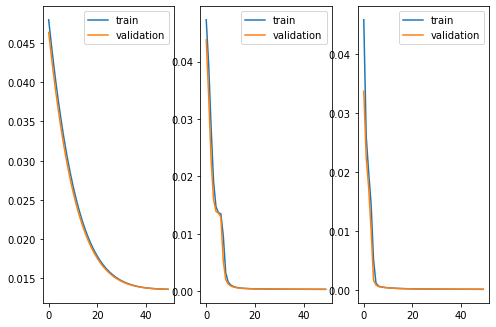

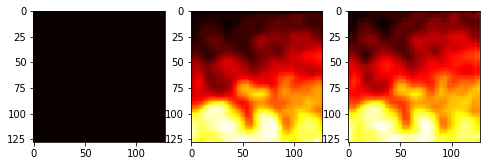

In [10]:
input_img = keras.Input(shape=(lat, long,1))

fig1 = plt.figure(figsize=(8,12)) # mse loss
fig2 = plt.figure(figsize=(8,12)) # image

for i in range(1,6):
    x = layers.Conv2D(math.pow(2,i), (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(math.pow(2,i-1), (3, 3), activation='relu',strides=(1,1), padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2DTranspose(math.pow(2,i-1), (3, 3), activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(math.pow(2,i), (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((4, 4))(x)
    decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

    decoded_data = autoencoder.predict(np.array([test_set[10]]))
    
    ax1 = fig1.add_subplot(2,3,i)
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.legend(['train', 'validation'], loc='upper right')
    
    ax2 = fig2.add_subplot(2,3,i)
    ax2.imshow(decoded_data[0,:,:,0],cmap='hot')

## bottleneck size n x n x 4, where n = 32, 16, 8 or 4

In [ ]:
fig3 = plt.figure(figsize=(8,8)) # mse loss
fig4 = plt.figure(figsize=(8,8)) # image

for i in range(1,5):
    x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(2, (3, 3), activation='relu',strides=(1,1), padding='same')(x)
    encoded = layers.MaxPooling2D((int(math.pow(2,i)),int(math.pow(2,i))), padding='same')(x)

    x = layers.Conv2DTranspose(2, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((int(math.pow(2,i+1)),int(math.pow(2,i+1))))(x)
    decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

    decoded_data = autoencoder.predict(np.array([test_set[10]]))
    
    ax1 = fig3.add_subplot(2,2,i)
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.legend(['train', 'validation'], loc='upper right')
    
    ax2 = fig4.add_subplot(2,2,i) 
    ax2.imshow(decoded_data[0,:,:,0],cmap='hot')

In [ ]:
# aaa

# aaa